In [1]:
import json 

# loadijg dataset
dataset = json.load(open("Dataset/tf-idf-dataset.json", "r"))

In [2]:
import numpy as np

from sklearn.model_selection import train_test_split


X = []
y = []
classes = dataset["ClassNames"]

# extracting X and y from json dataset
for data in dataset["Dataset"]:
    X.append(data["x"])
    y.append(data["y"])

print(f"total dataset length: {len(X)}")

X = np.array(X)
y = np.array(y)

# spliting dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


total dataset length: 42663


In [3]:
print(x_train.shape)
print(y_train.shape)

(29864, 5000)
(29864, 8)


In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## training ANN with keras

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation


model = Sequential()
model.add(Dense(1000, input_shape=(5000,)))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(len(classes))) # output layer
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=10, verbose=1)
model.save(f"Models/keras_ann_v1.h5")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5001000   
                                                                 
 activation (Activation)     (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 activation_1 (Activation)   (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               100200    
                                                                 
 activation_2 (Activation)   (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1

In [13]:
# getting y_red for x_test i want to see test set precission, classification_report and confusion_matrix
y_pred = model.predict(x_test, batch_size=128)
y_pred_1d = y_pred.argmax(1)
y_test_1d = y_test.argmax(1)


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f"{classification_report(y_pred_1d, y_test_1d, target_names=classes)}")

              precision    recall  f1-score   support

  Automobile       0.94      0.94      0.94      1603
      Living       0.68      0.75      0.71      1459
      Health       0.88      0.87      0.87      1605
       Daily       0.79      0.71      0.75      1808
       Sport       0.94      0.93      0.94      1605
  Technology       0.91      0.93      0.92      1543
     Economy       0.85      0.87      0.86      1575
    Magazine       0.95      0.94      0.94      1601

    accuracy                           0.87     12799
   macro avg       0.87      0.87      0.87     12799
weighted avg       0.87      0.87      0.87     12799



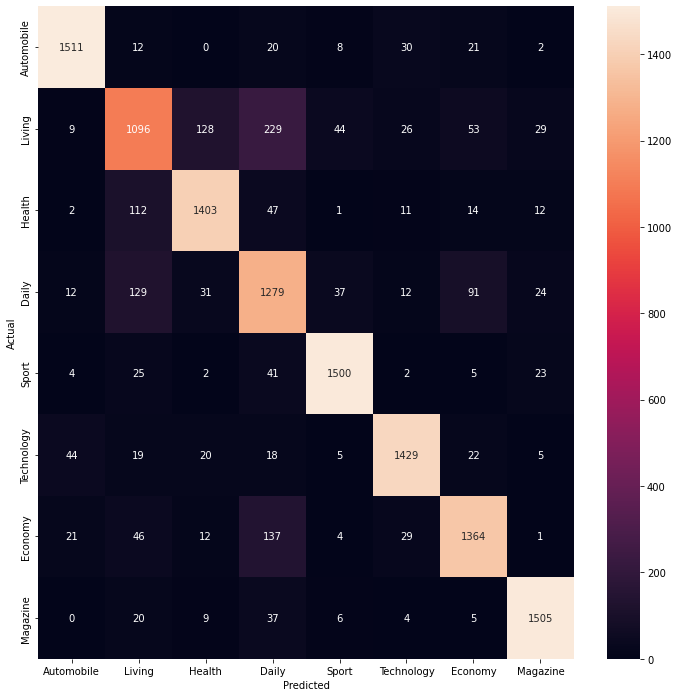

In [43]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(y_test_1d, y_pred_1d, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 12)) # for more bigger plot
sn.heatmap(confusion_matrix, annot=True, xticklabels=classes, yticklabels=classes, fmt='g')
plt.show()


My conclusion is living, health and daily classes has more similar content and this reason it makes lower accuracy.
If you will look at precision and recall you will see model living hard times to trust prediction on Daily class
Also i analysed Daily Class myself and it has more news variation than others.
As you can understand living and health has relation between them and it is makes hard to classify